In [ ]:
# O objetivo desta tarefa é encontrar algum tipo de relação entre o atributo education e o atributo income da base de dados do censo

# Carregue o arquivo census.csv

# Crie um novo dataframe com o pandas utilizando somente esses dois campos 'education' e 'income'

# Você pode utilizar o comando groupby do pandas para agrupar os dados, ou seja, a quantidade de registros baseado nesses dois atributos. 

# Identifique o nível de educação que possuem as maiores e menores rendas. Lembre-se que nesta base de dados a renda assume somente os valores >50 e <=50

In [1]:
# importação de bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Carregamento da base de dados em uma variável

dados = pd.read_csv('../data/census.csv')
# 'census.csv' é um arquivo com alguns dados do census dos estados unidos

In [3]:
# Visualização dos primeiros registros

dados.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# agrupamento dos dados

dados.groupby(['education', 'income']).size()

education      income
 10th           <=50K     871
                >50K       62
 11th           <=50K    1115
                >50K       60
 12th           <=50K     400
                >50K       33
 1st-4th        <=50K     162
                >50K        6
 5th-6th        <=50K     317
                >50K       16
 7th-8th        <=50K     606
                >50K       40
 9th            <=50K     487
                >50K       27
 Assoc-acdm     <=50K     802
                >50K      265
 Assoc-voc      <=50K    1021
                >50K      361
 Bachelors      <=50K    3134
                >50K     2221
 Doctorate      <=50K     107
                >50K      306
 HS-grad        <=50K    8826
                >50K     1675
 Masters        <=50K     764
                >50K      959
 Preschool      <=50K      51
 Prof-school    <=50K     153
                >50K      423
 Some-college   <=50K    5904
                >50K     1387
dtype: int64

In [5]:
# filtro para selecionar apenas as duas variaveis de interesse

dados = dados[['education', 'income']]

In [7]:
# criação de um dataframe com apenas as duas variaveis de interesse e agrupadas por educação e renda

agrupados = dados.groupby(['education', 'income']).size().reset_index(name='counts')
agrupados = pd.DataFrame(agrupados)
agrupados

,education,income,counts
0,10th,<=50K,871
1,10th,>50K,62
2,11th,<=50K,1115
3,11th,>50K,60
4,12th,<=50K,400
5,12th,>50K,33
6,1st-4th,<=50K,162
7,1st-4th,>50K,6
8,5th-6th,<=50K,317
9,5th-6th,>50K,16


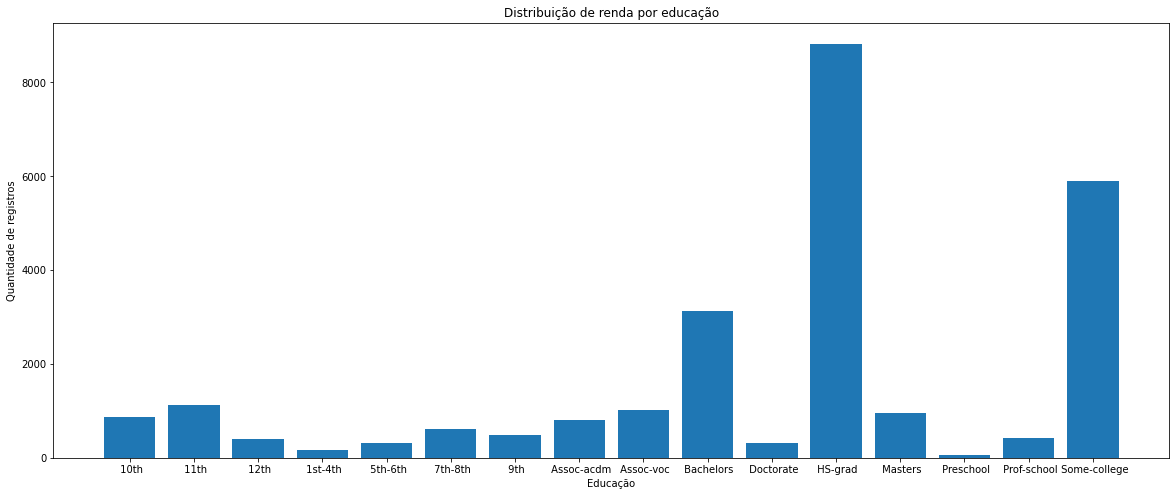

In [31]:
plt.figure(figsize=(20,8))
plt.bar(agrupados['education'], agrupados['counts'])
plt.title('Distribuição de renda por educação')
plt.xlabel('Educação')
plt.ylabel('Quantidade de registros')
plt.show()

In [ ]:
# separar por grupos de renda
# ordem crescente de quantidade de registros
# selecionar os grupos com mais e menos renda